# Case Assignment 2
## Giant Motor Company

This case deals with strategic planning issues for a large company. The main issue is planning the company’s production capacity for the coming year. At issue is the overall level of capacity and the type of capacity—for example, the degree of flexibility in the manufacturing system. The main tool used to aid the company’s planning process is a mixed integer linear programming (MILP) model. A mixed integer program has both integer and continuous variables.

### Problem Statement

The Giant Motor Company (GMC) produces three lines of cars for the domestic (U.S.) market: Lyras, Libras, and Hydras. The Lyra is a relatively inexpensive subcompact car that appeals mainly to first-time car owners and to households using it as a second car for commuting. The Libra is a sporty compact car that is sleeker, faster, and roomier than the Lyra. Without any options, the Libra costs slightly more than the Lyra; additional options increase the price. The Hydra is the luxury car of the GMC line. It is significantly more expensive than the Lyra and Libra, and it has the highest profit margin of the three cars.

### Retooling Options for Capacity Expansion

Currently GMC has three manufacturing plants in the United States. Each plant is dedicated to producing a single line of cars. In its planning for the coming year, GMC is considering the retooling of its Lyra and/or Libra plants. Retooling either plant would represent a major expense for the company. The retooled plants would have significantly increased production capacities. Although having greater fixed costs, the retooled plants would be more efficient and have lower marginal production costs—that is, higher marginal profit contributions. In addition, the retooled plants would be flexible—they would have the capability of producing more than one line of cars.

The retooled Lyra and Libra plants are prefaced by the word new. The fixed costs and capacities in Table 6.9 are given on an annual basis. A dash in the profit margin section indicates that the plant cannot manufacture that line of car. For example, the new Lyra plant would be capable of producing both Lyras and Libras but not Hydras. The new Libra plant would be capable of producing any of the three lines of cars. Note, however, that the new Libra plant has a slightly lower profit margin for producing Hydras than the Hydra plant. The flexible new Libra plant is capable of producing the luxury Hydra model but is not as efficient as the current Hydra plant that is dedicated to Hydra production. 

The fixed costs are annual costs incurred by GMC, independent of the number of cars produced by the plant. For the current plant configurations, the fixed costs include property taxes, insurance, payments on the loan that was taken out to construct the plant, and so on. If a plant is retooled, the fixed costs will include the previous fixed costs plus the additional cost of the renovation. The additional renovation cost will be an annual cost representing the cost of the renovation amortized over a long period. 

### Demand for GMC Cars

Short-term demand forecasts have been very reliable in the past and are expected to be reliable in the future. 

A quick comparison of plant capacities and demands indicates that GMC is faced with insufficient capacity. Partially offsetting the lack of capacity is the phenomenon of demand diversion. If a potential car buyer walks into a GMC dealer showroom wanting to buy a Lyra but the dealer is out of stock, frequently the salesperson can convince the customer to purchase the better Libra car, which is in stock. Unsatisfied demand for the Lyra is said to be diverted to the Libra. Only rarely in this situation can the salesperson convince the customer to switch to the luxury Hydra model.

From past experience, GMC estimates that 30% of unsatisfied demand for Lyras is diverted to demand for Libras and 5% to demand for Hydras. Similarly, 10% of unsatisfied demand for Libras is diverted to demand for Hydras. For example, if the demand for Lyras is 1,400,000 cars, then the unsatisfied demand will be 400,000 if no capacity is added. Out of this unsatisfied demand,
will materialize as demand for Libras, and will materialize as demand for Hydras. Similarly, if the demand for Libras is 1,220,000 cars (1,100,000 original demand plus 120,000 demand diverted from Lyras), then the unsatisfied demand for Lyras would be 420,000 if no capacity is added. Out of this unsatisfied demand, 42,000 will materialize as demand for Hydras. All other unsatisfied demand is lost to competitors. 

-- *Practical Management Science*

In [1]:
import gurobipy as gp
from gurobipy import GRB
from itertools import product
import numpy as np

def get_solution(m):
    print("Solution Values:")
    for var in m.getVars():
        print(f"    {var.VarName}: {var.X}")

In [2]:
DATA = {
    "Plants": {
        "Lyra": {
            "Capacity": 1000 * 1000, 
            "Fixed Cost": 2000 * 1000000,
            "Plant Profit Margin": 
                {
                    "Lyra": 2 * 1000,
                    "Libra": 0,
                    "Hydra": 0
                }
        },
        "Libra": {
            "Capacity": 800 * 1000,
            "Fixed Cost": 2000 * 1000000,
            "Plant Profit Margin":
                {   
                    "Lyra": 0,
                    "Libra": 3 * 1000,
                    "Hydra": 0
                }
        },
        "Hydra": {
            "Capacity": 900 * 1000,
            "Fixed Cost": 2600 * 1000000,
            "Plant Profit Margin":
                {   
                    "Lyra": 0,
                    "Libra": 0,
                    "Hydra": 5 * 1000
                }
        },
        "New Lyra": {
            "Capacity": 1600 * 1000,
            "Fixed Cost": 3400 * 1000000,
            "Plant Profit Margin":
                {
                    "Lyra": 2.5 * 1000,
                    "Libra": 3 * 1000,
                    "Hydra": 0
                }
        },
        "New Libra": {
            "Capacity": 1800 * 1000,
            "Fixed Cost": 3700 * 1000000,
            "Plant Profit Margin":
                {
                    "Lyra": 2.3 * 1000,
                    "Libra": 3.5 * 1000,
                    "Hydra": 4.8 * 1000
                }
        }
    },
    "Demand": { 
        "Lyra": 1400 * 1000,
        "Libra": 1100 * 1000,
        "Hydra": 800 * 1000
    },
    "Demand Diversion": {
        "Lyra": {
            "Libra": .3,
            "Hydra": .05
        },
        "Libra": {
            "Lyra": 0,
            "Hydra": .1
        },
        "Hydra": {
            "Lyra": 0,
            "Libra": 0
        }
    }
}



In [11]:
def solve_model(DATA, force_open_plants=True, verbose=False):
    plants = DATA["Plants"].keys()
    cars = DATA["Demand"].keys()
    productions = [(plant, car) for plant in plants for car in cars]
    
    # Create a new model
    m = gp.Model('GMC')
    m.setParam('OutputFlag', verbose)
    
    # Decision variables
    O = m.addVars(plants, vtype=GRB.BINARY, name="Plant")
    P = m.addVars(productions, vtype=GRB.INTEGER, name="Production", lb=0.0)
    D = m.addVars(cars, vtype=GRB.INTEGER, name="Demand", lb=0.0)
    
    
    # Constraints
    # 1.Retooling Constraint:
    for plant in ["Lyra", "Libra"]:
       m.addConstr(
            (O[f"{plant}"] + O[f"New {plant}"] <= 1),
            name="Retool"
        )
    
    # 2.Plant Open Constraint (Force Open or Optional):

    if force_open_plants:
       m.addConstr(
           gp.quicksum(O[plant] for plant in plants) == 3
       )
    else:
       m.addConstr(
        gp.quicksum(O[plant] for plant in plants) <= 3
    )        
    
    # 3.Capacity Constraint:
    m.addConstrs(
        (gp.quicksum(P[(plant, car)] for car in cars) <= O[plant] * DATA["Plants"][plant]["Capacity"]
         for plant in plants),
        "Capacity"
    )
    # 4.Demand Satisfaction with Diversion:
    m.addConstrs(
        (D[car] == DATA["Demand"][car] + gp.quicksum(
            DATA["Demand Diversion"][alternative][car] * (
                DATA["Demand"][alternative] - gp.quicksum(P[(plant, alternative)] for plant in plants)
            )
            for alternative in DATA["Demand Diversion"][car].keys()
        )
        for car in cars),
        name="Demand"
    )
    
    m.addConstrs(
        (gp.quicksum(P[(plant, car)] for plant in plants) <= D[car]
         for car in cars),
        "Demand"
    )
    
    m.setObjective(
        gp.quicksum(
            P[(plant, car)] * DATA["Plants"][plant]["Plant Profit Margin"][car]
            for (plant, car) in productions
        ) - gp.quicksum(
            O[plant] * DATA["Plants"][plant]["Fixed Cost"] for plant in plants
        ),
        GRB.MAXIMIZE
    )
    
    # Solve it!
    m.optimize()
    print(f"Optimal objective value: ${round(m.objVal, 2)}")
    get_solution(m)
    
    return m, O, P, D

# Run the function
m, O, P, D = solve_model(DATA, force_open_plants=True)


Optimal objective value: $2585707500.0
Solution Values:
    Plant[Lyra]: 0.0
    Plant[Libra]: 1.0
    Plant[Hydra]: 1.0
    Plant[New Lyra]: 1.0
    Plant[New Libra]: -0.0
    Production[Lyra,Lyra]: -0.0
    Production[Lyra,Libra]: -0.0
    Production[Lyra,Hydra]: -0.0
    Production[Libra,Lyra]: -0.0
    Production[Libra,Libra]: 799998.0
    Production[Libra,Hydra]: -0.0
    Production[Hydra,Lyra]: 7.0
    Production[Hydra,Libra]: -0.0
    Production[Hydra,Hydra]: 802857.0
    Production[New Lyra,Lyra]: 1257143.0
    Production[New Lyra,Libra]: 342857.0
    Production[New Lyra,Hydra]: -0.0
    Production[New Libra,Lyra]: -0.0
    Production[New Libra,Libra]: -0.0
    Production[New Libra,Hydra]: -0.0
    Demand[Lyra]: 1400000.0
    Demand[Libra]: 1142855.0
    Demand[Hydra]: 802857.0


In [4]:
def get_production(car):
    production = 0
    for x in P.keys():
        if x[1] == car:
            production += P[x].X
    return production

## Questions

1. How many decision variables are there?
    * Answer: Binary_variables: 5 (one for each plant) + Production_variables: 5 plants * 3 cars = 15 + Demand_variables: 3 cars = 3

Total_decision_variables = 5 + 15 + 3 = 23.

2. Intentional under-production (unmet demand) for Lyra's is successful in driving more demand for the more expensive car models. Show your work.
    * Answer: 

In [19]:
print("Under production of Lyra for each car:", {car: get_production("Lyra") < DATA["Demand"][car] for car in DATA["Demand"].keys()})


Under production of Lyra for each car: {'Lyra': True, 'Libra': False, 'Hydra': False}


In [29]:
solutions = {'Lyra_Demand': [], 'Libra_Demand':[], 'Hydra_Demand':[]}

# Starting demand for Lyra
lyra_demand_start = DATA["Demand"]["Lyra"]
libra_demand = DATA["Demand"]["Libra"]
hydra_demand = DATA["Demand"]["Hydra"]


# Iterate through decreasing values of Lyra's demand
for lyra_demand in range(lyra_demand_start, 0, -10000):  # Decrease in steps of 100,000
    DATA["Demand"]["Lyra"] = lyra_demand  # Update Lyra's demand in DATA
    DATA["Demand"]["Libra"]=libra_demand
    DATA["Demand"]["Hydra"]=hydra_demand

    solutions['Lyra_Demand'].append(lyra_demand)
    solutions['Libra_Demand'].append(libra_demand)
    solutions['Hydra_Demand'].append(hydra_demand)
    
solutions  

{'Lyra_Demand': [1400000,
  1390000,
  1380000,
  1370000,
  1360000,
  1350000,
  1340000,
  1330000,
  1320000,
  1310000,
  1300000,
  1290000,
  1280000,
  1270000,
  1260000,
  1250000,
  1240000,
  1230000,
  1220000,
  1210000,
  1200000,
  1190000,
  1180000,
  1170000,
  1160000,
  1150000,
  1140000,
  1130000,
  1120000,
  1110000,
  1100000,
  1090000,
  1080000,
  1070000,
  1060000,
  1050000,
  1040000,
  1030000,
  1020000,
  1010000,
  1000000,
  990000,
  980000,
  970000,
  960000,
  950000,
  940000,
  930000,
  920000,
  910000,
  900000,
  890000,
  880000,
  870000,
  860000,
  850000,
  840000,
  830000,
  820000,
  810000,
  800000,
  790000,
  780000,
  770000,
  760000,
  750000,
  740000,
  730000,
  720000,
  710000,
  700000,
  690000,
  680000,
  670000,
  660000,
  650000,
  640000,
  630000,
  620000,
  610000,
  600000,
  590000,
  580000,
  570000,
  560000,
  550000,
  540000,
  530000,
  520000,
  510000,
  500000,
  490000,
  480000,
  470000,
  46

In [30]:
solutions = {'Lyra_Demand': [], 'Libra_Demand': [], 'Hydra_Demand': []}

# Starting demand for Lyra
lyra_demand_start = DATA["Demand"]["Lyra"]
libra_demand_start = DATA["Demand"]["Libra"]
hydra_demand_start = DATA["Demand"]["Hydra"]

# Diversion rates from Lyra to Libra and Hydra
diversion_rate_libra = DATA["Demand Diversion"]["Lyra"]["Libra"]
diversion_rate_hydra = DATA["Demand Diversion"]["Lyra"]["Hydra"]

# Iterate through decreasing values of Lyra's demand
for lyra_demand in range(lyra_demand_start, 0, -100000):  # Decrease in steps of 100,000
    DATA["Demand"]["Lyra"] = lyra_demand  # Update Lyra's demand in DATA
    
    # Calculate unmet demand for Lyra
    unmet_lyra_demand = lyra_demand_start - lyra_demand
    
    # Calculate diverted demand for Libra and Hydra based on unmet demand for Lyra
    diverted_demand_libra = diversion_rate_libra * unmet_lyra_demand
    diverted_demand_hydra = diversion_rate_hydra * unmet_lyra_demand
    
    # Effective demand for Libra and Hydra after considering diverted demand
    effective_libra_demand = libra_demand_start + diverted_demand_libra
    effective_hydra_demand = hydra_demand_start + diverted_demand_hydra
    
    # Store results in solutions dictionary
    solutions['Lyra_Demand'].append(lyra_demand)
    solutions['Libra_Demand'].append(effective_libra_demand)
    solutions['Hydra_Demand'].append(effective_hydra_demand)

# Display the results
solutions

{'Lyra_Demand': [10000],
 'Libra_Demand': [1100000.0],
 'Hydra_Demand': [800000.0]}

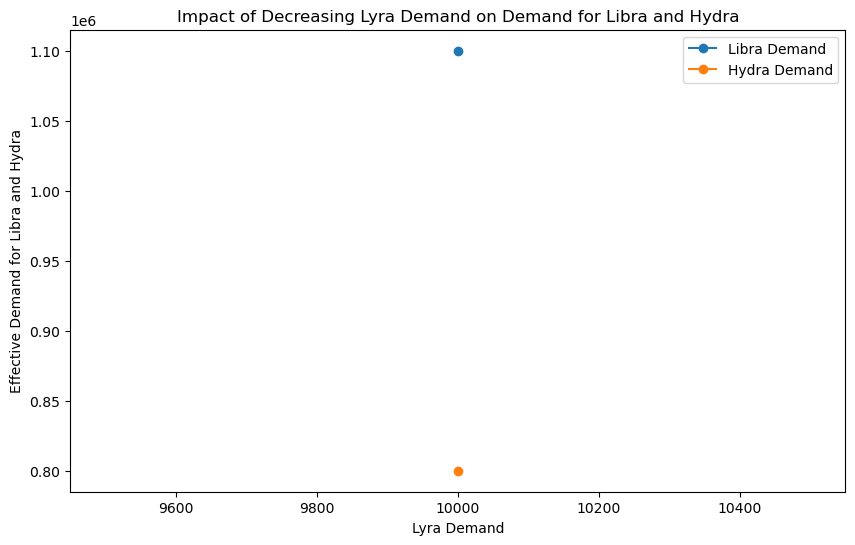

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to store results
solutions = {'Lyra_Demand': [], 'Libra_Demand': [], 'Hydra_Demand': []}

# Starting demand for Lyra
lyra_demand_start = DATA["Demand"]["Lyra"]

# Function to calculate demand diversion based on reduced demand for Lyra
def solve_demand_diversion(lyra_demand):
    # Calculate unmet demand for Lyra
    unmet_lyra_demand = lyra_demand_start - lyra_demand
    
    # Diversion rates from Lyra to Libra and Hydra
    diversion_rate_libra = DATA["Demand Diversion"]["Lyra"]["Libra"]
    diversion_rate_hydra = DATA["Demand Diversion"]["Lyra"]["Hydra"]
    
    # Calculate diverted demand
    diverted_demand_libra = diversion_rate_libra * unmet_lyra_demand
    diverted_demand_hydra = diversion_rate_hydra * unmet_lyra_demand
    
    # Calculate effective demand for Libra and Hydra after diversion
    effective_libra_demand = DATA["Demand"]["Libra"] + diverted_demand_libra
    effective_hydra_demand = DATA["Demand"]["Hydra"] + diverted_demand_hydra
    
    return effective_libra_demand, effective_hydra_demand

# Test different levels of reduced demand for Lyra
for reduction in range(0, lyra_demand_start + 1, 100000):  # Decrease in steps of 100,000
    lyra_demand = lyra_demand_start - reduction
    effective_libra_demand, effective_hydra_demand = solve_demand_diversion(lyra_demand)
    
    # Store the demand levels in solutions
    solutions['Lyra_Demand'].append(lyra_demand)
    solutions['Libra_Demand'].append(effective_libra_demand)
    solutions['Hydra_Demand'].append(effective_hydra_demand)

# Convert the solutions dictionary into a DataFrame
df = pd.DataFrame.from_dict(solutions)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df['Lyra_Demand'], df['Libra_Demand'], label="Libra Demand", marker='o')
plt.plot(df['Lyra_Demand'], df['Hydra_Demand'], label="Hydra Demand", marker='o')
plt.xlabel('Lyra Demand')
plt.ylabel('Effective Demand for Libra and Hydra')
plt.title('Impact of Decreasing Lyra Demand on Demand for Libra and Hydra')
plt.legend()
plt.show()


3. GMC should retool the Libra plant.
    * Answer: 

In [ ]:
If we keep the Hydra plant open, then the answer is no, we should not retool the Libra plant as is evident from the objective solution above but if we happen to (in case we are allowed to) shut down the Hydra plant, then yes we should retool the libra plant

4. How much additional demand is driven for Hydras?
    * Answer: 

In [22]:
total_production_hydra = get_production("Hydra")
additional_demand_for_hydra = total_production_hydra - DATA["Demand"]["Hydra"]

print("Additional demand for Hydras:", additional_demand_for_hydra)


Additional demand for Hydras: 2857.0


5. If GMC can, they should close the Hydra plant. (Relax the constraint which forces the Hydra plant to be open and resolve the model). Show your work.
    * Answer: True

In [14]:
no_force_m, no_force_O, no_force_P, no_force_D = solve_model(DATA, force_open_plants=False)
print("Close Hydra?:", no_force_O["Hydra"].X == 0)
print(f"Optimal objective value after relaxing constraints: ${round(no_force_m.objVal, 2)}")


Optimal objective value: $4040000000.0
Solution Values:
    Plant[Lyra]: 0.0
    Plant[Libra]: -0.0
    Plant[Hydra]: 0.0
    Plant[New Lyra]: 1.0
    Plant[New Libra]: 1.0
    Production[Lyra,Lyra]: -0.0
    Production[Lyra,Libra]: -0.0
    Production[Lyra,Hydra]: -0.0
    Production[Libra,Lyra]: -0.0
    Production[Libra,Libra]: 0.0
    Production[Libra,Hydra]: -0.0
    Production[Hydra,Lyra]: -0.0
    Production[Hydra,Libra]: -0.0
    Production[Hydra,Hydra]: -0.0
    Production[New Lyra,Lyra]: 1400000.0
    Production[New Lyra,Libra]: 100000.0
    Production[New Lyra,Hydra]: -0.0
    Production[New Libra,Lyra]: -0.0
    Production[New Libra,Libra]: 1000000.0
    Production[New Libra,Hydra]: 800000.0
    Demand[Lyra]: 1400000.0
    Demand[Libra]: 1100000.0
    Demand[Hydra]: 800000.0
Close Hydra?: True
Optimal objective value after relaxing constraints: $4040000000.0


6. Modify the data so that demand for Libras is 2,000,000. Does that change the retooling plan? (True = Yes, False = No).
    * Answer: True

In [25]:
from copy import deepcopy
assumption = deepcopy(DATA)
assumption["Demand"]["Libra"] = 2000000
new_model, new_O, new_P, new_D = solve_model(new_data, force_open_plants=False)
retooling_changed = any(new_O[plant].X != O[plant].X for plant in DATA["Plants"].keys())
print("Does changing Libra's demand affect the retooling plan?", retooling_changed)

Optimal objective value: $4958779000.0
Solution Values:
    Plant[Lyra]: 0.0
    Plant[Libra]: 0.0
    Plant[Hydra]: 0.0
    Plant[New Lyra]: 1.0
    Plant[New Libra]: 1.0
    Production[Lyra,Lyra]: 0.0
    Production[Lyra,Libra]: 0.0
    Production[Lyra,Hydra]: 0.0
    Production[Libra,Lyra]: 0.0
    Production[Libra,Libra]: 0.0
    Production[Libra,Hydra]: 0.0
    Production[Hydra,Lyra]: 0.0
    Production[Hydra,Libra]: 0.0
    Production[Hydra,Hydra]: 0.0
    Production[New Lyra,Lyra]: 223500.0
    Production[New Lyra,Libra]: 1376480.0
    Production[New Lyra,Hydra]: 0.0
    Production[New Libra,Lyra]: 0.0
    Production[New Libra,Libra]: 976470.0
    Production[New Libra,Hydra]: 823530.0
    Demand[Lyra]: 1400000.0
    Demand[Libra]: 2352950.0
    Demand[Hydra]: 823530.0
Does changing Libra's demand affect the retooling plan? True


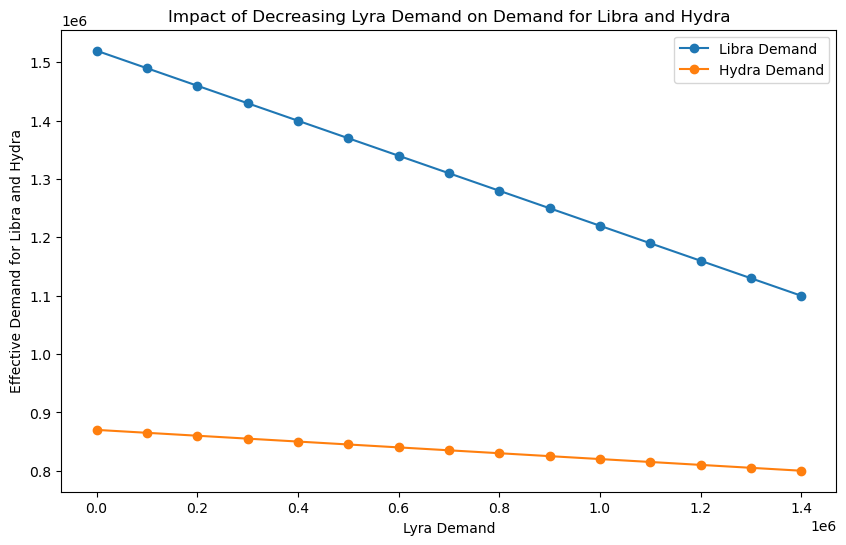

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to store results
solutions = {'Lyra_Demand': [], 'Libra_Demand': [], 'Hydra_Demand': []}

# Starting demand for Lyra
lyra_demand_start = DATA["Demand"]["Lyra"]

# Function to calculate demand diversion based on reduced demand for Lyra
def solve_demand_diversion(lyra_demand):
    # Calculate unmet demand for Lyra
    unmet_lyra_demand = lyra_demand_start - lyra_demand
    
    # Diversion rates from Lyra to Libra and Hydra
    diversion_rate_libra = DATA["Demand Diversion"]["Lyra"]["Libra"]
    diversion_rate_hydra = DATA["Demand Diversion"]["Lyra"]["Hydra"]
    
    # Calculate diverted demand
    diverted_demand_libra = diversion_rate_libra * unmet_lyra_demand
    diverted_demand_hydra = diversion_rate_hydra * unmet_lyra_demand
    
    # Calculate effective demand for Libra and Hydra after diversion
    effective_libra_demand = DATA["Demand"]["Libra"] + diverted_demand_libra
    effective_hydra_demand = DATA["Demand"]["Hydra"] + diverted_demand_hydra
    
    return effective_libra_demand, effective_hydra_demand

# Test different levels of reduced demand for Lyra
for reduction in range(0, lyra_demand_start + 1, 100000):  # Decrease in steps of 100,000
    lyra_demand = lyra_demand_start - reduction
    effective_libra_demand, effective_hydra_demand = solve_demand_diversion(lyra_demand)
    
    # Store the demand levels in solutions
    solutions['Lyra_Demand'].append(lyra_demand)
    solutions['Libra_Demand'].append(effective_libra_demand)
    solutions['Hydra_Demand'].append(effective_hydra_demand)

# Convert the solutions dictionary into a DataFrame
df = pd.DataFrame.from_dict(solutions)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df['Lyra_Demand'], df['Libra_Demand'], label="Libra Demand", marker='o')
plt.plot(df['Lyra_Demand'], df['Hydra_Demand'], label="Hydra Demand", marker='o')
plt.xlabel('Lyra Demand')
plt.ylabel('Effective Demand for Libra and Hydra')
plt.title('Impact of Decreasing Lyra Demand on Demand for Libra and Hydra')
plt.legend()
plt.show()